# Week 13 - Advanced Machine Learning

During the course we have covered a variety of different tasks and algorithms. These were chosen for their broad applicability and ease of use with many important techniques and areas of study skipped. The goal of this class is to provide a brief overview of some of the latest advances and areas that could not be covered due to our limited time.

## Boosting

Boosting is an area I briefly mentioned in week 11 when I discussed ensembles. I mention it here again to make the point that the gap between the best known algorithms and the most easily utilized algorithms is often very narrow, or even nonexistent.  

[Adaboost](http://www.sciencedirect.com/science/article/pii/S002200009791504X) utilizes adaptive boosting. It was developed in 2003 and was regarded as the best out-of-the-box algorithm for many years.

[XGBoost](http://arxiv.org/abs/1603.02754) is an [open source package](https://github.com/dmlc/xgboost) with bindings for a variety of programming languages including python. The approach taken is slightly different to Adaboost and utilizes [gradient boosting](http://xgboost.readthedocs.org/en/latest/model.html) instead of adaptive boosting. Work began on the package in 2014 and it has rapidly grown in popularity, in part due to several high profile wins in machine learning competitions.

Scikit learn has implementations for both Adaboost and gradient tree boosting

In [17]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.95996732026143794

In [19]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.95343137254901966

## Semi-supervised

[Semi-supervised learning](http://scikit-learn.org/stable/modules/label_propagation.html) attempts to use unlabeled data to better understand the structure of the data and apply this information to constructing a model using the labeled samples.

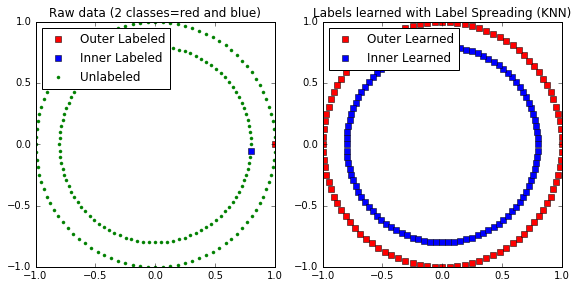

In [21]:
# http://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html

# Authors: Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# Licence: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-1] = inner

###############################################################################
# Learn with LabelSpreading
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=1.0)
label_spread.fit(X, labels)

###############################################################################
# Plot output labels
output_labels = label_spread.transduction_
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plot_outer_labeled, = plt.plot(X[labels == outer, 0],
                               X[labels == outer, 1], 'rs')
plot_unlabeled, = plt.plot(X[labels == -1, 0], X[labels == -1, 1], 'g.')
plot_inner_labeled, = plt.plot(X[labels == inner, 0],
                               X[labels == inner, 1], 'bs')
plt.legend((plot_outer_labeled, plot_inner_labeled, plot_unlabeled),
           ('Outer Labeled', 'Inner Labeled', 'Unlabeled'), loc='upper left',
           numpoints=1, shadow=False)
plt.title("Raw data (2 classes=red and blue)")

plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plot_outer, = plt.plot(X[outer_numbers, 0], X[outer_numbers, 1], 'rs')
plot_inner, = plt.plot(X[inner_numbers, 0], X[inner_numbers, 1], 'bs')
plt.legend((plot_outer, plot_inner), ('Outer Learned', 'Inner Learned'),
           loc='upper left', numpoints=1, shadow=False)
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

## Active learning

Active learning is related to semi-supervised learning, with active learning being a more iterative process. The algorithm chooses which samples to request labels for. This can be a very useful approach when many samples are available but labelling them is expensive.

The goal with active learning is to choose a set of samples to label that would most improve the performance of the model. There are a variety of different ways the samples can be chosen:

* Distributed across the feature space
* Uncertainty
* Disagreement between multiple models
* Potential for model change
* . . . and many others

Examples can be found in [compound screening](http://www.ncbi.nlm.nih.gov/pubmed/26840049), [data mapping](http://www.ncbi.nlm.nih.gov/pubmed/26793094), and [study categorization](http://www.ncbi.nlm.nih.gov/pubmed/26262175).

## Recommender systems

Recommender systems attempt to predict the rating a user would give for an item. The most famous example of such a system was the [Netflix prize](https://en.wikipedia.org/wiki/Recommender_system#The_Netflix_Prize). These systems continue to be widely used in ecommerce. There are a variety of different ways to implement these systems:

* Content-based filtering
* Collaborative filtering
* Hybrid approach

## Deep learning

![Basic neural network](files/Colored_neural_network.png)

Although there is a neural network available on the [development version of scikit learn](http://scikit-learn.org/dev/modules/neural_networks_supervised.html) it only runs on the CPU making the large neural networks now popular prohibitively slow. Fortunately, there are a number of different packages available for python that can run on a GPU. 

[Theano](https://github.com/Theano/Theano) is the GPGPU equivalent of numpy. It implements all the core functionality needed to build a deep neural network, and run it on the GPGPU, but does not come with an existing implementation.

A variety of packages have been built on top of Theano that enable neural networks to be implemented in a relatively straightforward manner. Parrallels can be draw with the relationship between numpy and scikit learn. [Pylearn2](http://deeplearning.net/software/pylearn2/) has been around for a number of years but has been somewhat superseded by a number of new packages, including [blocks](https://blocks.readthedocs.org/en/latest), [keras](http://keras.io/), and [lasagne](https://lasagne.readthedocs.org/en/latest).

You may have also heard of [TensorFlow](http://tensorflow.org/) that was released by Google relatively recently. TensorFlow lies somewhere between the low-level Theano and the high-level packages such as blocks, keras, and lasagne. Currently only keras supports TensorFlow as an alternative backend.

Installing these packages with support for executing code on the GPU is more challenging than simply `conda install ...` or `pip install ...`. In addition to installing these packages it is also necessary to to install the CUDA packages. Information in this step is usually provided for each of the packages.

Beyond the advances due to the greater computational capacity available on the GPU there have been a number of other important approaches utilized:

* Convolutional neural nets
* Recurrent neural nets
* Dropout
* Early stopping
* Data augmentation

![Convolutional neural network architecture](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
[Aphex34](https://commons.wikimedia.org/w/index.php?title=User:Aphex34&action=edit&redlink=1) via wikimedia.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

15302656/15296311 [==============================] - 8s     


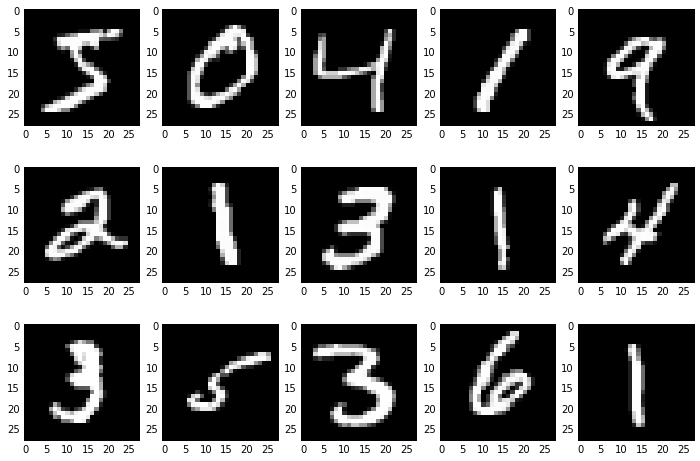

In [14]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], interpolation='nearest')
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 512
nb_classes = 10
nb_epoch = 3

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [16]:
model = Sequential()

#model.add(Convolution2D(8, 1, 3, 3, input_shape=(1,28,28), activation='relu'))
model.add(Convolution2D(4, 3, 3, input_shape=(1,28,28), activation='relu'))
model.add(Convolution2D(4, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4, input_dim=4*28*28*0.25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 16751s - loss: 2.0576 - val_loss: 1.7605
Epoch 2/3
60000/60000 [==============================] - 17079s - loss: 1.8584 - val_loss: 1.4857
Epoch 3/3
17408/60000 [=======>......................] - ETA: 11282s - loss: 1.8249

C:\Users\stree\Anaconda3\lib\site-packages\keras\models.py:385: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, MaxPoolGrad{ds=(2, 2), ignore_border=True, st=(2, 2), padding=(0, 0), mode='max'}.0, Elemwise{add,no_inplace}.0)
Toposort index: 114
Inputs types: [TensorType(float32, (True, True, True, True)), TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(1, 1, 1, 1), (512, 4, 24, 24), (512, 4, 24, 24)]
Inputs strides: [(4, 4, 4, 4), (9216, 2304, 96, 4), (9216, 2304, 96, 4)]
Inputs values: [array([[[[ 0.5]]]], dtype=float32), 'not shown', 'not shown']
Outputs clients: [[Sum{axis=[0, 2, 3], acc_dtype=float64}(Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0), ConvOp{('imshp', (4, None, None)),('kshp', (3, 3)),('nkern', None),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'full'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (4, None, None)),('kshp_logical', (3, 3)),('kshp_logical_top_aligned', True)}(Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0, Subtensor{::, ::, ::int64, ::int64}.0), InplaceDimShuffle{1,0,2,3}(Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[predictions == 7][i].reshape((28,28)), interpolation='nearest')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
plt.bone()
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
import numpy as np
np.fill_diagonal(cm, 0)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')